In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from display_lego_pattern import display_lego_pattern
from matrix import *
from get_color_of_roi import get_color_of_roi
from detect_circles import detect_circles
from take_image import take_image
from extract_plate import extract_plate

In [83]:
def fix_row(wrong_row:list,start_pixel:int, range_size:int):
    range_to_check = start_pixel
    wrong_row = sorted(wrong_row)
    range_to_check = start_pixel
    end_range_to_check = range_to_check+range_size
    #get average y value in this row
    avg_y_value = int(sum(elem[1] for elem in wrong_row) / len(wrong_row))

    for i in range(20):
        
        #check all ranges if there is an entry in wrong row
        #print('Range start check',range_to_check)
        #print('Range end check',end_range_to_check)
        #print(wrong_row[i][0])
        if wrong_row[i][0] not in range(range_to_check,end_range_to_check):
        
            #insert a new point in the list
            #print('------------------') 
            #print('point',i+1,'is not in range')
            #print('------------------\n')
            #insert a point with average + half the range x and y value for this row
            insertion_values =(int(range_to_check+(range_size/2)),avg_y_value)
            print(insertion_values)
            wrong_row.insert(i,insertion_values)
            fixed_row = wrong_row

        # set new values for the range to check
        range_to_check += range_size
        end_range_to_check += range_size
    
    if len(fixed_row) == 20:
        return fixed_row
    else:
        print('error')

In [84]:
def sort_coordinates_by_y(coordinates:list, threshold:int):
    # Sort coordinates by y value
    coordinates.sort(key=lambda c: c[1])
    
    # Group coordinates into rows based on y value range
    rows = []
    current_row = []
    previous_y = None
    
    for x, y in coordinates:
        if previous_y is None or y - previous_y <= threshold:  # define range by your requirement
            current_row.append((x, y))
        else:
            rows.append(current_row)
            current_row = [(x, y)]
        
        previous_y = y
    
    if current_row:
        rows.append(current_row)
    
    # Sort rows by average y value
    rows.sort(key=lambda r: sum(c[1] for c in r) / len(r))
    
    return rows

In [147]:
planpath = '/home/steve/Vorlesungen/FE_Projekt/F-E_Projekt_Montage/photos/plan_castle/pyramide4.png'
photopath = '/home/steve/Vorlesungen/FE_Projekt/F-E_Projekt_Montage/photos/ids_pyramide/pyramide1.jpg'



photo = cv2.imread(photopath)
photo = cv2.cvtColor(photo,cv2.COLOR_BGR2RGB)

photo = extract_plate(photo)
circles_list, circle_image = detect_circles(photo,real_photo=True, expected_circles_per_longest_side=10, debug=False)
#plt.imshow(circle_image)
#plt.show(block=True)
#print(sorted(circles_template))

circles found: 400


In [148]:

photo_width = photo.shape[0]
print(photo_width)
number_of_ranges = 21
range_size = int(round(photo_width/number_of_ranges))
print('range_size',range_size)
#print(sorted(circles_list))
start_pixel = int(round(range_size/2))

#From here a detected circle can occur
print('start_pixel', start_pixel)

#from here on no circle should be 
end_pixel = int(round(photo_width - start_pixel))
print('end_pixel', end_pixel)



821
range_size 39
start_pixel 20
end_pixel 801


# Sort the rows by the y value and just find ones where len != 20

In [149]:
rows = sort_coordinates_by_y(circles_list,threshold=17)
for i in range(len(rows)):
    if len(rows[i]) == 20: # row contains right amount of circles
        print('Row:',i+1,'is correct')
        continue
    else:
        print('---------------------------------------------------------------')
        print('Row:',i+1,'with length', len(rows[i]))
        wrong_row = rows[i]
        print(rows[i])
        #rows[i] = fix_row(wrong_row)
        print('Fixed row:',rows[i])
        print('\n')
    

Row: 1 is correct
Row: 2 is correct
Row: 3 is correct
Row: 4 is correct
Row: 5 is correct
Row: 6 is correct
Row: 7 is correct
Row: 8 is correct
Row: 9 is correct
Row: 10 is correct
Row: 11 is correct
Row: 12 is correct
Row: 13 is correct
Row: 14 is correct
Row: 15 is correct
Row: 16 is correct
Row: 17 is correct
Row: 18 is correct
Row: 19 is correct
Row: 20 is correct


# Sort the rows by the y value and fix the ones where len != 20


In [150]:
rows = sort_coordinates_by_y(circles_list,threshold=15)
for i in range(len(rows)):
    if len(rows[i]) == 20: # row contains right amount of circles
        print('Row:',i+1,'is correct')
        continue
    else:
        print('---------------------------------------------------------------')
        print('Row:',i+1,'with length', len(rows[i]))
        wrong_row = rows[i]
        print(rows[i])
        rows[i] = fix_row(wrong_row, start_pixel, range_size)
        print('Fixed row:',rows[i])
        print('\n')
    

Row: 1 is correct
Row: 2 is correct
Row: 3 is correct
Row: 4 is correct
Row: 5 is correct
Row: 6 is correct
Row: 7 is correct
Row: 8 is correct
Row: 9 is correct
Row: 10 is correct
Row: 11 is correct
Row: 12 is correct
Row: 13 is correct
Row: 14 is correct
Row: 15 is correct
Row: 16 is correct
Row: 17 is correct
Row: 18 is correct
Row: 19 is correct
Row: 20 is correct


Number of circles after fix grids:  400


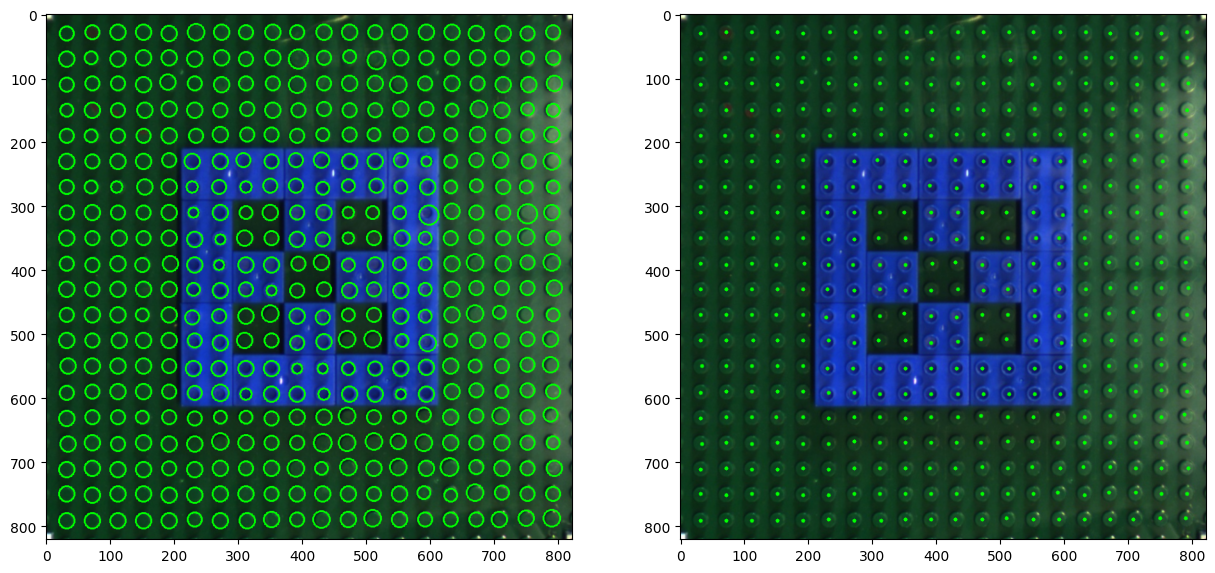

In [151]:

img = photo.copy()

# define the function to draw a circle around a point
def draw_circle(img, x,y):
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)
number= 0
# loop through the coordinates and draw a circle around each point
for idx,j in enumerate(rows):
    for coord in j:
     
        draw_circle(img, int(coord[0]), int(coord[1]))
        number+=1
print('Number of circles after fix grids: ',number)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(circle_image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img)

In [152]:
range_to_check = start_pixel
wrong_row = sorted(wrong_row)
range_to_check = start_pixel
end_range_to_check = range_to_check+range_size
#get average y value in this row
avg_y_value = int(sum(elem[1] for elem in wrong_row) / len(wrong_row))



for i in range(20):
    
    #check all ranges if there is an entry in wrong row
    print('Range start check',range_to_check)
    print('Range end check',end_range_to_check)
    print(wrong_row[i][0])
    if wrong_row[i][0] in range(range_to_check,end_range_to_check):
        print('all good','\n')
    else:
        #insert a new point in the list
        print('------------------') 
        print('point',i+1,'is not in range')
        print('------------------\n')
        #insert a point with average + half the range x and y value for this row
        insertion_values =(int(range_to_check+(range_size/2)),avg_y_value)
        print(insertion_values)
        wrong_row.insert(i,insertion_values)


    # set new values for the range to check
    range_to_check += range_size
    end_range_to_check += range_size
    

     

Range start check 20
Range end check 59
30
all good 

Range start check 59
Range end check 98
72
all good 

Range start check 98
Range end check 137
114
all good 

Range start check 137
Range end check 176
152
all good 

Range start check 176
Range end check 215
192
all good 

Range start check 215
Range end check 254
234
all good 

Range start check 254
Range end check 293
260
all good 

Range start check 293
Range end check 332
304
all good 

Range start check 332
Range end check 371
346
all good 

Range start check 371
Range end check 410
390
all good 

Range start check 410
Range end check 449
430
all good 

Range start check 449
Range end check 488
476
all good 

Range start check 488
Range end check 527
520
all good 

Range start check 527
Range end check 566
560
all good 

Range start check 566
Range end check 605
592
all good 

Range start check 605
Range end check 644
634
all good 

Range start check 644
Range end check 683
672
all good 

Range start check 683
Range end check 

In [153]:
wrong_row

[(30, 592),
 (72, 592),
 (114, 592),
 (152, 592),
 (192, 592),
 (234, 583),
 (260, 576),
 (304, 576),
 (346, 570),
 (390, 576),
 (430, 572),
 (476, 570),
 (520, 574),
 (560, 572),
 (592, 590),
 (634, 590),
 (672, 590),
 (710, 588),
 (750, 592),
 (792, 590)]